In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/content.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01-01-2012 00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,01-01-2012 01:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,01-01-2012 02:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,01-01-2012 03:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,01-01-2012 04:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
x= 'Thunderstorms,Moderate Rain Showers,Fog'

In [ ]:
list_of_lists=[w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [ ]:
from itertools import chain
flat_list=list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [ ]:
def Create_list(x):
  list_of_lists=[w.split() for w in x.split(',')]
  flat_list=list(chain(*list_of_lists))
  return flat_list

def Get_Weather(list1):
  if 'Fog' in list1 and 'Rain' in list1:
    return 'RAIN+FOG'
  elif 'Snow' in list1 and 'Rain' in list1:
    return 'SNOW+RAIN'
  elif 'Snow' in list1:
    return 'SNOW'
  elif 'Rain' in list1:
    return 'RAIN'
  elif 'Fog' in list1:
    return 'FOG'
  elif 'Clear' in list1:
    return 'Clear'
  elif 'Cloudy' in list1:
    return 'Cloudy'
  else:
    return 'RAIN'



In [ ]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [ ]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [ ]:
data['Std_Weather']=data['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [ ]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,01-01-2012 00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,01-01-2012 01:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,01-01-2012 02:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,01-01-2012 03:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,01-01-2012 04:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [ ]:
data.Std_Weather.value_counts()

Std_Weather
Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

data balancing

In [ ]:
 cloudy_df = data[data['Std_Weather']=='Cloudy'].sample(600)
 cloudy_df.shape

(600, 9)

In [ ]:
 clear_df = data[data['Std_Weather']=='Clear'].sample(600)
 clear_df.shape

(600, 9)

In [ ]:
rain_df=data[data['Std_Weather']=='RAIN']
snow_df=data[data['Std_Weather']=='SNOW']

In [ ]:
rain_df.shape

(603, 9)

NEW WEATHER DATSET

In [ ]:
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
4505,07-06-2012 17:00,29.5,20.2,57,15,24.1,100.38,Cloudy,Cloudy
2764,4/25/2012 4:00,4.8,-0.3,70,15,25.0,99.80,Mostly Cloudy,Cloudy
4430,07-03-2012 14:00,27.3,13.0,41,9,48.3,100.66,Cloudy,Cloudy
4957,7/25/2012 13:00,23.4,13.1,52,19,48.3,100.66,Mostly Cloudy,Cloudy
8151,12-05-2012 15:00,0.1,-7.6,56,26,24.1,101.47,Mostly Cloudy,Cloudy


In [ ]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [ ]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [ ]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [ ]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [ ]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.797075,1.654006,72.108944,16.509962,23.331793,100.814175
std,11.333530,10.455704,16.283600,9.412188,12.871418,0.922249
min,-23.200000,-28.500000,18.000000,0.000000,0.600000,97.520000
25%,-2.900000,-6.700000,61.000000,9.000000,16.100000,100.290000
50%,5.500000,0.500000,76.000000,15.000000,24.100000,100.850000
75%,16.600000,10.500000,85.000000,22.000000,25.000000,101.440000
max,32.500000,23.100000,99.000000,70.000000,48.300000,103.610000


In [ ]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [ ]:
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.938948,-0.256874,-0.121416,0.394032,-0.101941
Dew Point Temp_C,0.938948,1.000000,0.085374,-0.113735,0.182373,-0.210696
Rel Hum_%,-0.256874,0.085374,1.000000,0.034972,-0.651260,-0.319697
Wind Speed_km/h,-0.121416,-0.113735,0.034972,1.000000,-0.152577,-0.398490
Visibility_km,0.394032,0.182373,-0.651260,-0.152577,1.000000,0.330827
Press_kPa,-0.101941,-0.210696,-0.319697,-0.398490,0.330827,1.000000


In [ ]:
num_cols=weather_df.select_dtypes(exclude=['object']).columns.tolist()
num_cols

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']

LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_Encoder=LabelEncoder()

In [ ]:
weather_df['Std_Weather']= label_Encoder.fit_transform(weather_df['Std_Weather'])

In [ ]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [ ]:
cat_code=dict(zip(label_Encoder.classes_,label_Encoder.transform(label_Encoder.classes_)))
cat_code

{'Clear': 0, 'Cloudy': 1, 'RAIN': 2, 'SNOW': 3}

In [ ]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

In [ ]:
X=weather_df.drop(['Std_Weather'],axis=1)
y=weather_df['Std_Weather']

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [ ]:
X_std=std_scaler.fit_transform(X)
X_std

array([[ 2.00358915,  1.77414415, -0.92805937, -0.16046025,  0.05969581,
        -0.47087911],
       [-0.1762468 , -0.18692383, -0.12954086, -0.16046025,  0.12963301,
        -1.09991018],
       [ 1.80943373,  1.08537881, -1.91085138, -0.79806676,  1.94022923,
        -0.16720893],
       ...,
       [-0.64398488, -0.30171805,  1.28322265,  1.22102052, -1.44006844,
        -0.93722973],
       [-0.61750914, -0.33041661,  1.03752465,  1.22102052, -1.05929928,
        -0.98061118],
       [-0.59985865, -0.35911516,  0.85325115,  1.43355602, -0.93496649,
        -1.00230191]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape, x_test.shape)

(1887, 6) (472, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
ETC=ExtraTreesClassifier()
SVM=SVC()
KNN=KNeighborsClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
NB=GaussianNB()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
models=[LR,DT,RF,ETC,SVM,KNN,GBC,ABC,NB]
features=X_std
labels = y
CV = 5
accu_list = []
ModelName = []

for model in models:
  model_name = model._class_._name_
  accuracies = cross_val_score(model, features, labels, labels, scoring = 'accuracy', cv = CV)
  accu_list.append(accuracies.mean()*100)
  ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model" : ModelName, "Cross_Val_Accuracy" : accu_list})
model_acc_df.sort_

AttributeError: 'LogisticRegression' object has no attribute '_class_'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pandas as pd

models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),SVC(),KNeighborsClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),GaussianNB(),XGBClassifier()]  # Adding XGBoost Classifier
features=X_std
labels = y
CV = 5
accu_list = []
ModelName = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring = 'accuracy', cv = CV)
  accu_list.append(accuracies.mean()*100)
  ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model" : ModelName, "Cross_Val_Accuracy" : accu_list})



In [ ]:
#model_acc_df.sort_values(by = ['Cross_Val_Accuracy'], ascending = False)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       120
           1       0.47      0.40      0.43       120
           2       0.76      0.69      0.72       121
           3       0.88      0.82      0.85       111

    accuracy                           0.66       472
   macro avg       0.67      0.66      0.66       472
weighted avg       0.66      0.66      0.66       472



<Axes: >

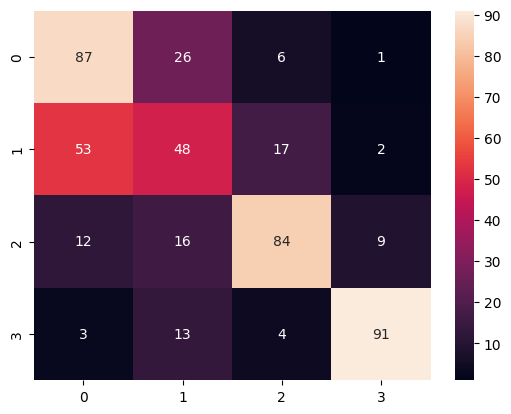

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = 'd')

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
parameters = {
    'n_estimators' : [50,100],
    'max_features' : ['sqrt','log2'],
    "criterion" : ["gini","entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator = RF,
                           param_grid = parameters)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model_new = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', n_estimators = 100)


In [ ]:
Random_forest_model_new.fit(x_train, y_train)
y_pred_rf = Random_forest_model_new.predict(x_test)
#accuracy_score(y_test, y_pred_rf)

In [ ]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
4505,29.5,20.2,57,15,24.1,100.38,1
2764,4.8,-0.3,70,15,25.0,99.80,1
4430,27.3,13.0,41,9,48.3,100.66,1
4957,23.4,13.1,52,19,48.3,100.66,1
8151,0.1,-7.6,56,26,24.1,101.47,1


In [ ]:
temp = float(input("Enter the Temp_C = "))
dpt = float(input("Enter the Dew Point Temp_C = "))
rh = float(input("Enter the Relative Humidity % = "))
ws = float(input("Enter the Wind Speed = "))
vs = float(input("Enter the Visibilty_km = "))
pr = float(input("Enter the Pressure Kpa = "))

Enter the Temp_C = 29
Enter the Dew Point Temp_C = 20
Enter the Relative Humidity % = 57
Enter the Wind Speed = 15
Enter the Visibilty_km = 24
Enter the Pressure Kpa = 100


In [ ]:
input_data = [temp, dpt, rh, ws, vs, pr]
scaled_data = std_scaler.transform([input_data])
prediction = Random_forest_model_new.predict(scaled_data)
prediction

array([0])

In [ ]:
if prediction[0] == 0:
  print("Weather is CLEAR")
elif prediction[0] == 1:
  print("Weather is CLOUDY")
elif prediction[0] == 2:
  print("Weather is RAINY")
else:
  print("Weather is SNOWY")

Weather is CLEAR


In [ ]:
Temp = float(input("Enter the Temp_C = "))
dpt = float(input("Enter the Dew Point Temp_C = "))
rh = float(input("Enter the Relative Humidity % = "))
ws = float(input("Enter the Wind Speed = "))
vs = float(input("Enter the Visibilty_km = "))
pr = float(input("Enter the Pressure Kpa = "))

input_data = [temp,dpt,rh,ws,vs,pr]
scaled_data = std_scaler.transform([input_data])
prediction = Random_forest_model_new.predict(scaled_data)

print("")
print("*********** Weather Prediction Machine Learning Model ***********")
print("")

if prediction[0] == 0:
  print("Weather is CLEAR")
elif prediction[0] == 1:
  print("Weather is CLOUDY")
elif prediction[0] == 2:
  print("Weather is RAINY")
else:
  print("Weather is SNOWY")

Enter the Temp_C = 44
Enter the Dew Point Temp_C = 23
Enter the Relative Humidity % = 46
Enter the Wind Speed = 5
Enter the Visibilty_km = 8.05
Enter the Pressure Kpa = 100.8

*********** Weather Prediction Machine Learning Model ***********

Weather is RAINY
